## <center><h1><b><i>Regression Model</i></b></h1></center>

#### **Importing Libraries**

In [59]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt

#### **Importing Dataset**

In [60]:
import pandas as pd
df = pd.read_csv(r'C:\Users\kurap\Downloads\data\WholesaleCustomersData.csv')
print("Rows",len(df))
print("columns",len(df.columns))
df.head()

Rows 440
columns 8


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [61]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### **Data Modeling**

#### * **Correlation**

In [62]:
print(df.corr())

                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery                   0.924641

**High Correlation found between Grocery and Detergents_Paper that indicates good linear model.**

**We are interested in the relationship between Grocery and Detergents_Paper**

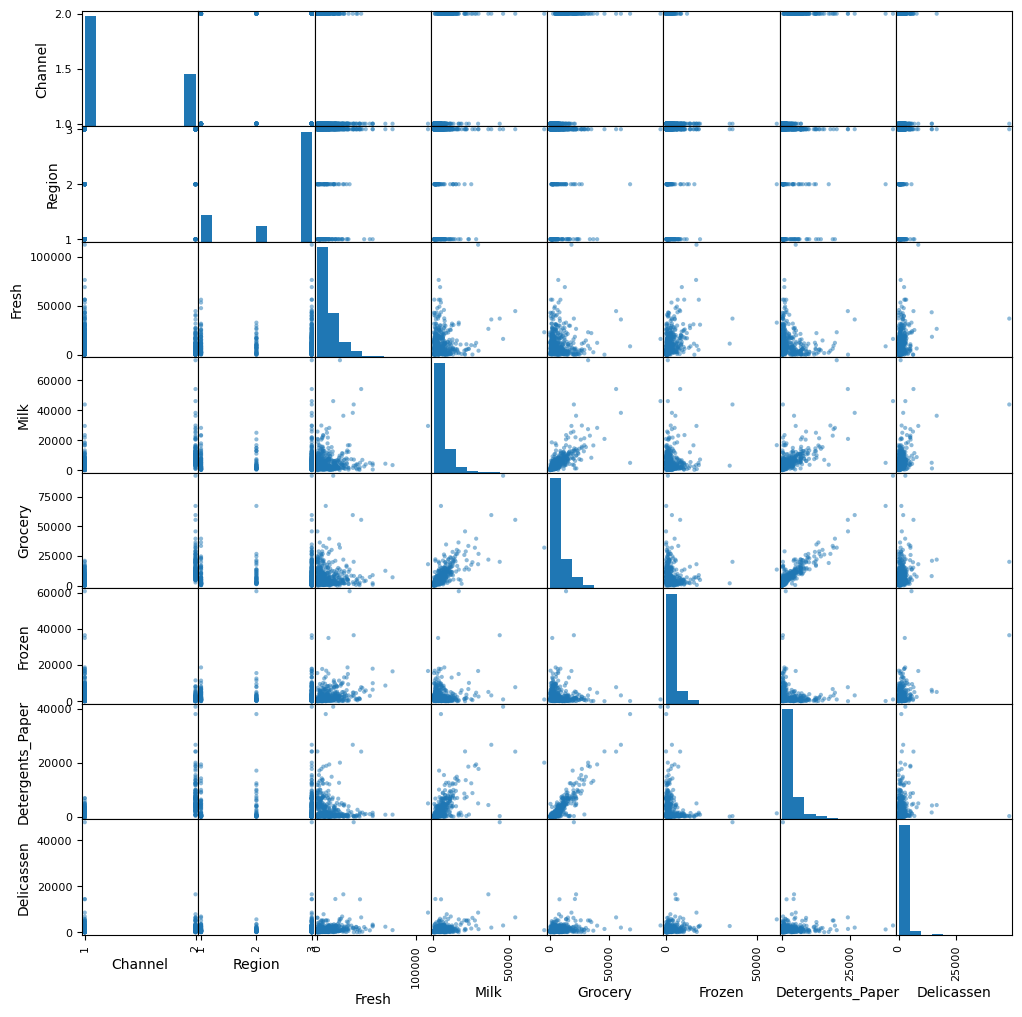

In [63]:
scatter_matrix(df, figsize=(12,12))
plt.savefig(r'C:\Users\kurap\Downloads\plots\my_plot.png')
plt.show()

## **Preparing Data**

In [64]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


**Dropping some attributes. My target variable is Grocery**

In [65]:
X=df.drop(['Channel','Region'], axis='columns')
y=df.Grocery
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [66]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## **Building Model**

In [67]:
lr_model= LinearRegression()  
lr_model.fit(X_train, y_train)

LinearRegression()

In [68]:
print("Intercept: ", lr_model.intercept_)
print("Slope: ", lr_model.coef_)
print("R square: ", lr_model.score(X,y))

Intercept:  3.637978807091713e-12
Slope:  [ 1.09400327e-16 -5.45378557e-16  1.00000000e+00 -2.26335557e-16
  1.82506979e-16 -3.25308712e-16]
R square:  1.0


Though we have seen 2 negetive coefficent, R-square value is 0.898 which is promising.

## **Checking RMSE**

In [69]:
print("RMSE", root_mean_squared_error(y_test,yhat))

RMSE 7.526562307903777e-08


### **Polynomial Regression**

***Now we are considering FRESH to do this calculation***

In [70]:
X['Fresh'] = np.square(df.Fresh)
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,160503561,9656,7561,214,2674,1338
1,49801249,9810,9568,1762,3293,1776
2,40360609,8808,7684,2405,3516,7844
3,175960225,1196,4221,6404,507,1788
4,511438225,5410,7198,3915,1777,5185


In [71]:
p_model= LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
p_model.fit(X_train, y_train)
yhat = p_model.predict(X_test)


print('R squared:', p_model.score(X,y))
print('RMSE', root_mean_squared_error(y_test, yhat))

R squared: 1.0
RMSE 5.148552862520287e-08


RMSE was 5.4064255678662315e-12, now it is 5.148552862520287e-08. It was Decreased

In [72]:
yhat = lr_model.predict(X_test)
print(root_mean_squared_error(y_test, yhat))

7.526562307903777e-08
